In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [13]:
# Step 3: Load Dataset
df = pd.read_csv(next(iter(uploaded)), sep='\t')  # dataset uses tab separator
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
df.shape  # Rows and Columns

df.info()  # Data types

df.describe()  # Summary stats

df.isnull().sum()  # Missing values

df.duplicated().sum()  # Duplicate rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

np.int64(0)

In [15]:
# Drop rows with too many NaNs
df.dropna(thresh=10, inplace=True)

# Fill specific missing columns
df['Income'] = df['Income'].fillna(df['Income'].median())


In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [17]:
df.drop_duplicates(inplace=True)


In [18]:
# Convert 'Dt_Customer' to datetime
df['dt_customer'] = pd.to_datetime(df['dt_customer'], errors='coerce')

# Check again
df.dtypes


,0
id,int64
year_birth,int64
education,object
marital_status,object
income,float64
kidhome,int64
teenhome,int64
dt_customer,datetime64[ns]
recency,int64
mntwines,int64


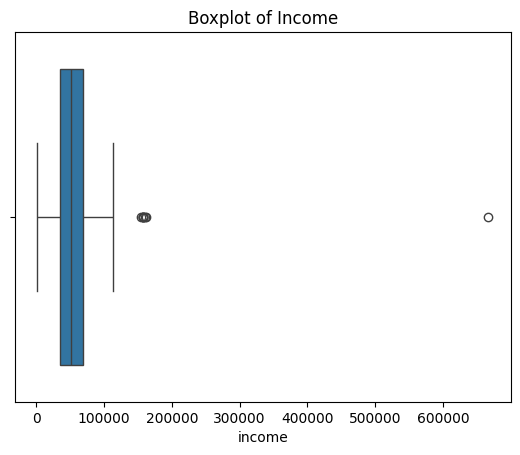

In [19]:
sns.boxplot(x=df['income'])
plt.title("Boxplot of Income")
plt.show()

# Remove outliers from Income
q1 = df['income'].quantile(0.25)
q3 = df['income'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['income'] >= lower) & (df['income'] <= upper)]


In [20]:
# Save cleaned dataset
df.to_csv('cleaned_customer_data.csv', index=False)
files.download('cleaned_customer_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>